Iterate and Evaluate a Classifier (data from Feedback Analysis using Naive Bayes)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
amz_raw = pd.read_csv('amazon_cells_labelled.txt', delimiter= '\t', header=None)
amz_raw.columns = ['message', 'sentiment']

In [3]:
amz_raw.head()

,message,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [58]:
keywords = ['sturdy', 'impressed', 'happy', 'love',\
            'beautiful', 'easy to use', 'recommend', 'best', 'ideal', 'nice',\
            'excellent', 'well made', 'works', 'worked', 'awesome', 'incredible', 'best',\
           'pleased', 'favorite', 'excited', 'worth', 'comfort', 'impressed', 'adorable',\
           'comfortable', 'perfect', 'nice', 'well', 'happy', 'happier'\
           'cool', 'better', 'perfectly', 'glad', 'timely', 'solid', 'satisfied'\
           'amazing', 'adorable', 'impressive']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amz_raw[str(key)] = amz_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [59]:
Total = amz_raw['sentiment'].sum()
print ('Total spam = ', Total)

amz_raw.info()

Total spam =  500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
message             1000 non-null object
sentiment           1000 non-null bool
good                1000 non-null bool
great               1000 non-null bool
excellent           1000 non-null bool
sturdy              1000 non-null bool
impressed           1000 non-null bool
happy               1000 non-null bool
love                1000 non-null bool
beautiful           1000 non-null bool
easy to use         1000 non-null bool
recommend           1000 non-null bool
best                1000 non-null bool
ideal               1000 non-null bool
nice                1000 non-null bool
well made           1000 non-null bool
works               1000 non-null bool
worked              1000 non-null bool
awesome             1000 non-null bool
incredible          1000 non-null bool
pleased             1000 non-null bool
favorite            1000 non-null bool
excited         

This tells us that 500 of the 1000 instances are spam and 500 are ham.

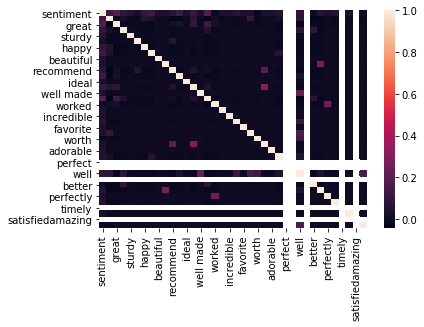

In [60]:
sns.heatmap(amz_raw.corr())

In [61]:
data = amz_raw[keywords]
target = amz_raw['sentiment']

In [62]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 364


In [63]:
accuracy1 = ((target == y_pred).sum() / data.shape[0])
print("Accuracy 1 = {}".format(accuracy1))

Accuracy 1 = 0.636


In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[485,  15],
       [349, 151]], dtype=int64)

In [65]:
keywords2 = ['sturdy', 'impressed', 'happy', 'love',\
            'beautiful', 'easy to use', 'recommend', 'best', 'ideal', 'nice',\
            'excellent', 'well made', 'works', 'worked', 'awesome', 'incredible', 'best',\
           'pleased', 'favorite', 'excited', 'worth', 'comfort', 'impressed', 'adorable',\
           'comfortable', 'perfect', 'greatest', 'best', 'nice', 'well', 'happy', 'happier'\
           'cool', 'better', 'easy', 'perfectly', 'glad', 'timely', 'solid', 'satisfied'\
           'amazing', 'adorable', 'impressive']

for key2 in keywords2:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amz_raw[str(key2)] = amz_raw.message.str.contains(
        ' ' + str(key2) + ' ',
        case=False
    )

In [66]:
data2 = amz_raw[keywords2]
target2 = amz_raw['sentiment']

In [67]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data2, target2)

# Classify, storing the result in a new variable.
y_pred2 = bnb.predict(data2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target2 != y_pred2).sum()
))

Number of mislabeled points out of a total 1000 points : 359


In [68]:
accuracy2 = ((target2 == y_pred2).sum() / data2.shape[0])
print("Accuracy 2 = {}".format(accuracy2))

Accuracy 2 = 0.641


In [69]:
keywords3 = ['good', 'great', 'excellent','sturdy', 'impressed', 'happy', 'love',\
            'beautiful', 'easy to use', 'recommend', 'best', 'ideal', 'nice',\
            'excellent', 'well made', 'works', 'worked', 'awesome', 'incredible', 'best',\
           'pleased', 'favorite', 'excited', 'worth', 'comfort', 'impressed', 'adorable',\
           'comfortable', 'perfect', 'greatest', 'best', 'nice', 'well', 'happy', 'happier'\
           'cool', 'better', 'easy', 'perfectly', 'glad', 'timely', 'solid', 'satisfied'\
           'amazing', 'adorable', 'impressive']

for key3 in keywords3:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amz_raw[str(key3)] = amz_raw.message.str.contains(
        ' ' + str(key3) + ' ',
        case=False
    )

In [70]:
data3 = amz_raw[keywords3]
target3 = amz_raw['sentiment']

In [71]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data3, target3)

# Classify, storing the result in a new variable.
y_pred3 = bnb.predict(data3)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data3.shape[0],
    (target3 != y_pred3).sum()
))

Number of mislabeled points out of a total 1000 points : 321


In [72]:
accuracy3 = ((target3 == y_pred3).sum() / data3.shape[0])
print("Accuracy 3 = {}".format(accuracy3))

Accuracy 3 = 0.679


Adding keywords ('greatest', 'best', 'easy') improve accuracy from 63.6% to 64.1%.

Addiing keywords ('good', 'great', 'excellent') as well improve accuracy from 64.1% to 67.9%.

Below, we'll testing the 'keywords' model with different holdout groups.

In [73]:
# Testing the keywords model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.595
Testing on Sample: 0.636


In [74]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.67, 0.61, 0.61, 0.63, 0.64, 0.6 , 0.63, 0.63, 0.62, 0.59])

Below, we'll test the 'keywords2' model with different holdout groups.

In [75]:
# Testing the keywords2 model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data2, target2, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data2, target2).score(data2, target2)))

With 20% Holdout: 0.59
Testing on Sample: 0.641


In [76]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data3, target3, cv=10)

array([0.7 , 0.66, 0.68, 0.66, 0.7 , 0.62, 0.68, 0.66, 0.67, 0.63])

Below, we'll test the 'keywords3' model with different holdout groups.

In [77]:
# Testing the keywords3 model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data2, target2, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data3, target3).score(data3, target3)))

With 20% Holdout: 0.59
Testing on Sample: 0.679


In [78]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data2, target2, cv=10)

array([0.68, 0.61, 0.61, 0.63, 0.65, 0.58, 0.64, 0.65, 0.62, 0.62])